In [128]:
import fuzzywuzzy
from fuzzywuzzy import process
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Show all rows**

In [2]:
#Show all rows
pd.set_option('max_rows', None)

# Data exploration / Data cleaning

**Read csv**

In [3]:
survey = pd.read_csv('Dataset/Mental Health in Tech - OSMI 2020.csv')

In [4]:
survey.head(10)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?
0,zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,45,Male,United States of America,Connecticut,White,NaN,United States of America,Connecticut
1,zhdmhaa8r0125c4zmoi7qzhdmtjrakhm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,24,female,Russia,NaN,NaN,NaN,Russia,NaN
2,x4itwa9hnlw7qke4y5xibx4itwa9yzl5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mental health should be a law by government.,1,46,Male,India,NaN,NaN,NaN,India,NaN
3,x3v3oimu5pn0043n8x3v3oizaybhwwto,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,25,Female,Canada,NaN,NaN,NaN,Canada,NaN
4,uyp6re7bhnyx6gez09uyp6re72z0e4e4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,1,25,F,Canada,NaN,NaN,NaN,Canada,NaN
5,u0nbmruq4qexmkk8zvqsu0nbmrh6he0e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ryry,1,5,f,United States of America,Alabama,Asian,NaN,United States of America,Alabama
6,t4ck9zq73fzi90rtcfgzu0ot4ck9zzub,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,NaN,Japan,NaN,NaN,NaN,Afghanistan,NaN
7,sics80avlof5gljw4fqrl7sics805x6i,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,35,Male,United States of America,Minnesota,White,NaN,United States of America,Minnesota
8,rd0ztpn1g47k7bhehrd0ztt4hk3qv0kp,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"family background, and personal responsibilites",0,34,female,Ireland,NaN,NaN,NaN,Ireland,NaN
9,qxhj26vbyd7zlgbi1xqxhj26nalmk3sa,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,23,Female,Turkey,NaN,NaN,NaN,Turkey,NaN


In [5]:
survey.describe()

,*Are you self-employed?*,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Have you ever discussed your mental health with your employer?,Have you ever discussed your mental health with coworkers?,Have you ever had a coworker discuss their or another coworker's mental health with you?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,*Do you have previous employers?*,...,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,Are you openly identified at work as a person with a mental health issue?,Has being identified as a person with a mental health issue affected your career?,How has it affected your career?,"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?",Describe the circumstances of the supportive or well handled response.,"Overall, how well do you think the tech industry supports employees with mental health issues?",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?
count,180.000000,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,155.000000,25.0,180.000000,...,180.000000,180.000000,180.000000,25.0,15.000000,180.000000,0.0,180.000000,180.000000,180.000000
mean,0.138889,0.625806,0.909677,0.258065,0.432258,0.428571,6.625806,5.238710,0.6,0.750000,...,0.455556,6.161111,0.144444,0.6,3.533333,4.900000,NaN,2.711111,0.338889,33.900000
std,0.346795,0.485483,0.287573,0.438988,0.496996,0.496486,2.129412,2.406927,0.5,0.434221,...,0.499410,2.748619,0.352520,0.5,2.825058,2.490429,NaN,0.994335,0.474652,9.900116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,0.0,0.750000,...,0.000000,5.000000,0.000000,0.0,2.000000,3.000000,NaN,2.000000,0.000000,27.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,5.000000,1.0,1.000000,...,0.000000,7.000000,0.000000,1.0,2.000000,5.000000,NaN,3.000000,0.000000,32.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,1.0,1.000000,...,1.000000,8.000000,0.000000,1.0,5.500000,7.000000,NaN,3.000000,1.000000,40.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.0,1.000000,...,1.000000,10.000000,1.000000,1.0,10.000000,10.000000,NaN,5.000000,1.000000,63.000000


In [16]:
print("Number of rows: {}, Number of columns: {}".format(survey.shape[0], survey.shape[1]))

Number of rows: 180, Number of columns: 120


##### Find countries column

In [116]:
user_country = survey["What country do you *live* in?"].value_counts()

Lets plot the countries to have a better understanding

https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values/51535326#51535326

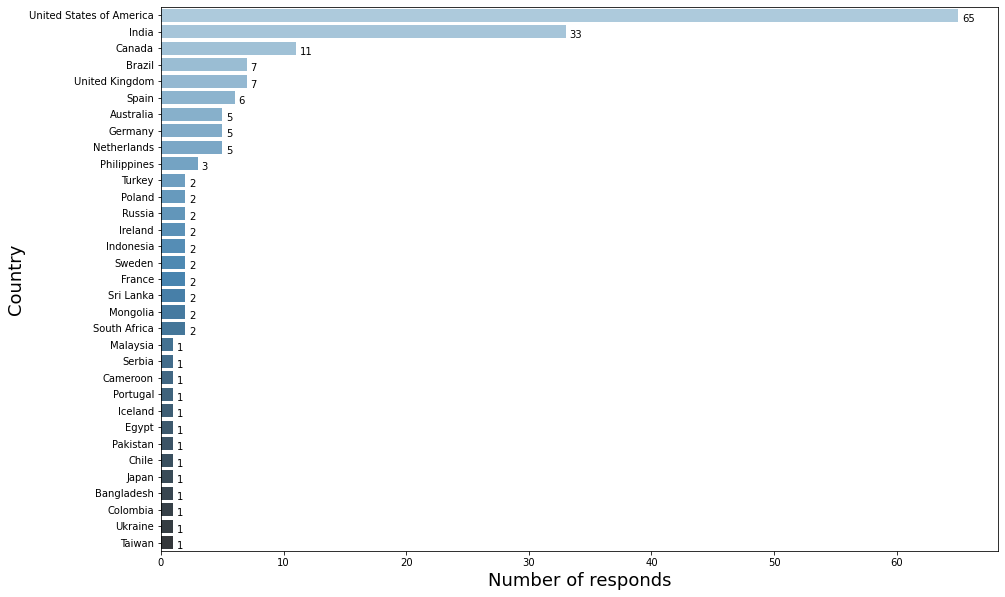

In [118]:
plt.figure(figsize=(15, 10))
sns_country = sns.barplot(x=user_country.values, y=user_country.index, palette=("Blues_d"))
plt.xlabel("Number of responds", fontsize=18)
plt.ylabel("Country", fontsize=18)

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(sns_country, "h", 0.3)

##### Find gender column

In [136]:
#Let's see all the unique values
user_gender = survey["What is your gender?"].unique()
user_gender

array(['Male', 'female', 'Female', 'F', 'f', nan, 'male', 'mail', 'M',
       'm', 'Woman', 'FEMALE', 'female, she/her', 'mostly male',
       'cisgender male', 'MAle'], dtype=object)

In [156]:
#Make a copy of dataframe to make new changes
survey_edited = survey.copy() #Changes we make won't change to the original because deep copy is by default (deep=True)

#Fuzzywuzzy - https://github.com/seatgeek/fuzzywuzzy
f_matches = fuzzywuzzy.process.extract("fe", user_gender, limit=16, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
m_matches = fuzzywuzzy.process.extract("ma", user_gender, limit=16, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

f_matches

[('F', 67),
 ('f', 67),
 ('female', 50),
 ('Female', 50),
 ('FEMALE', 50),
 ('Male', 33),
 ('male', 33),
 ('MAle', 33),
 ('female, she/her', 25),
 ('mostly male', 15),
 ('cisgender male', 12),
 (nan, 0),
 ('mail', 0),
 ('M', 0),
 ('m', 0),
 ('Woman', 0)]

Ratios needed to match the most:
- Male > 60
- Female > 50

In [ ]:
#Make function to change gender into 3 groups: male, female, other
def replace_matches_in_columns(df, column, string_to_match, ratio=60):

**Let's have a closer look at the column titles and their data types**

In [7]:
column_titles = survey.columns.tolist()
for index, title in enumerate(column_titles):
    print(index, title)

0 #
1 *Are you self-employed?*
2 How many employees does your company or organization have?
3 Is your employer primarily a tech company/organization?
4 Is your primary role within your company related to tech/IT?
5 Does your employer provide mental health benefits as part of healthcare coverage?
6 Do you know the options for mental health care available under your employer-provided health coverage?
7 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
8 Does your employer offer resources to learn more about mental health disorders and options for seeking help?
9 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
10 If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?
11 Would you feel more comfortable talking to your coworkers about yo

In [8]:
column_dtype = survey.dtypes
column_dtype

#                                                                                                                                                                                                                                    object
*Are you self-employed?*                                                                                                                                                                                                              int64
How many employees does your company or organization have?                                                                                                                                                                           object
Is your employer primarily a tech company/organization?                                                                                                                                                                             float64
Is your primary role within your company related to tech

In [17]:
# survey.loc[:, survey.dtypes==object] #Find the columns with dataype of object